Felzenszwalb number of segments: 789
SLIC number of segments: 223
Quickshift number of segments: 1381
Watershed number of segments: 255


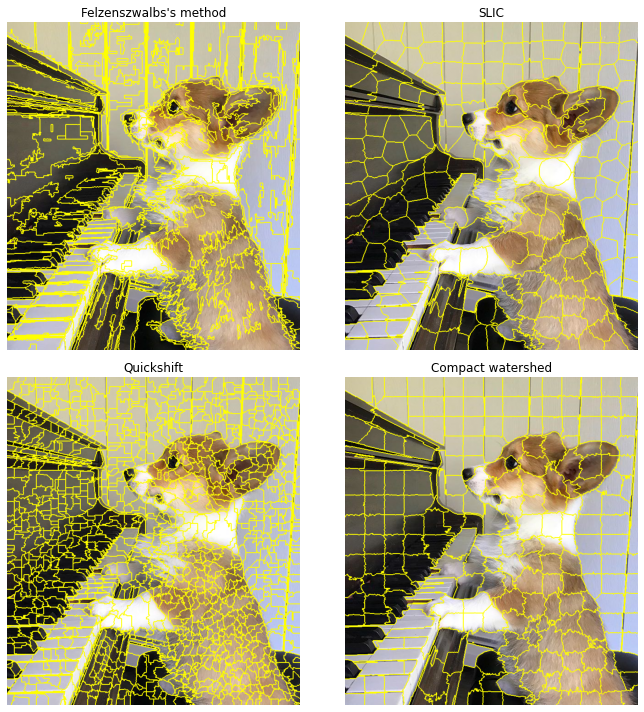

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = io.imread('/content/fav.jpg')

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1,
                     start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
print(f'Watershed number of segments: {len(np.unique(segments_watershed))}')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

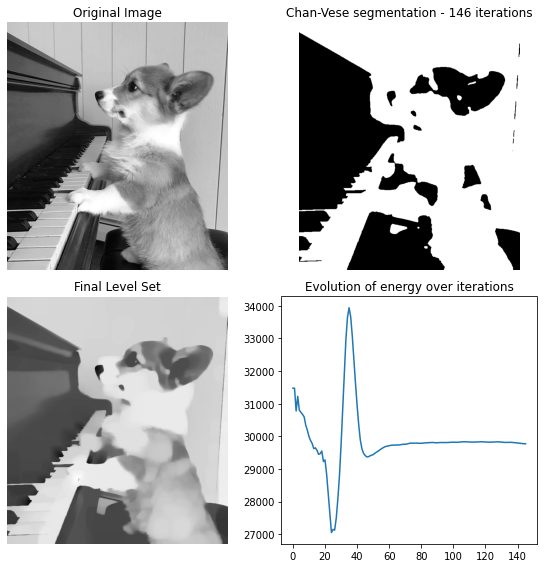

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
import skimage.io as io
image = io.imread('/content/fav.jpg', as_gray=True)
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3,
               max_num_iter=200, dt=0.5, init_level_set="checkerboard",
               extended_output=True)
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

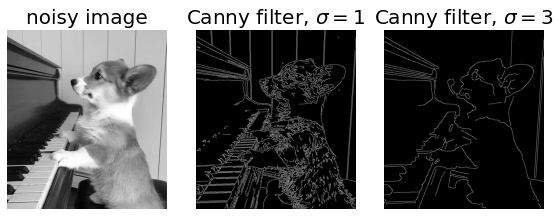

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
import skimage.io as io
image = io.imread('/content/fav.jpg', as_gray=True)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

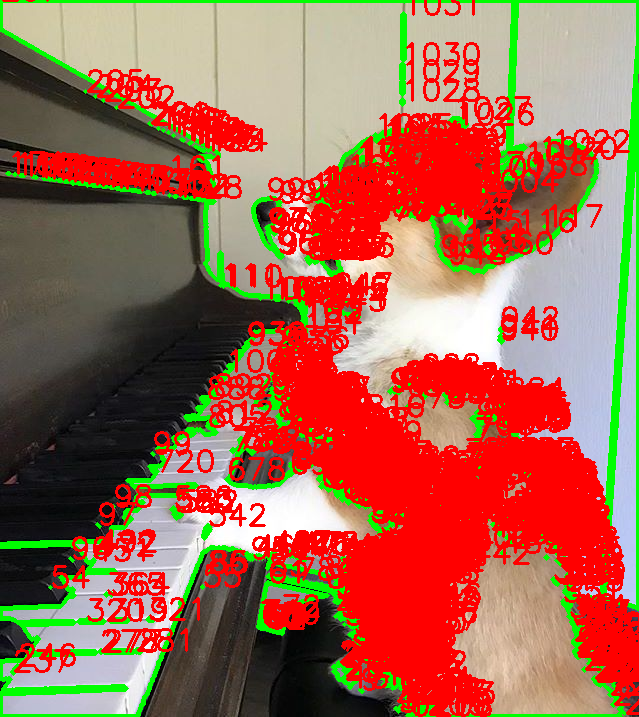

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Загрузите изображение
img = cv2.imread('/content/fav.jpg')

# Преобразуйте изображение в оттенки серого
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Примените пороговое преобразование
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Найдите контуры на бинарном изображении
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Нарисуйте контуры на изображении
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# Пронумеруйте контуры
for i, contour in enumerate(contours):
    cv2.putText(img, str(i), tuple(contour[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Отобразите изображение
cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()

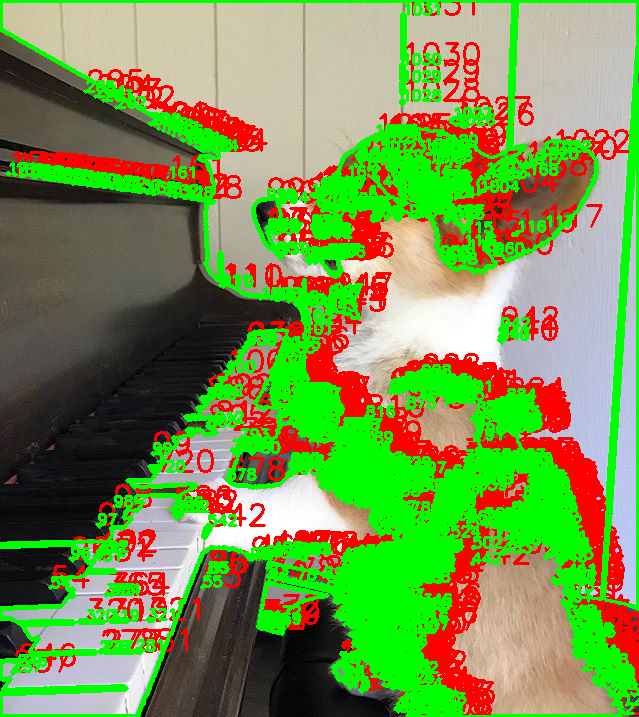

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Загрузите изображение
img = cv2.imread('/content/fav.jpg')

# Преобразуйте изображение в оттенки серого
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Примените пороговое преобразование
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Найдите контуры на бинарном изображении
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Нарисуйте контуры на изображении
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# Пронумеруйте контуры
for i, contour in enumerate(contours):
    cv2.putText(img, str(i), tuple(contour[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

 # Рисование контуров на изображении
color = (0, 255, 0)
thickness = 2
for i, contour in enumerate(contours):
    cv2.drawContours(img, [contour], 0, color, thickness)
    cv2.putText(img, str(i), tuple(contour[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

  # Отобразите изображение
cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()